In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
import re 
from datetime import datetime
import math as mth
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

##  Step 1. Open the data file and read the general information
- Data on prices of products - "/datasets/product_codes_us.csv"
- Data on purchases made by customer - "/datasets/retail_dataset_us.csv"

In [2]:
prices = pd.read_csv("/datasets/product_codes_us.csv", sep=";")
prices.head()

productID  price_per_one
0     10002           0.85
1     10080           0.85
2     10120           0.21
3    10123C           0.65
4    10124A           0.42

In [3]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
productID        3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [4]:
prices.duplicated().sum()

0

In [5]:
prices.isnull().sum()

productID        0
price_per_one    0
dtype: int64

In [6]:
prices.describe()

price_per_one
count    3159.000000
mean        2.954495
std         7.213808
min         0.000000
25%         0.650000
50%         1.450000
75%         3.290000
max       175.000000

We opend the first dataset of prices. We have 2 columns: product id and price for each product. We don't have any missing or duplicated values. The price on items varies from 0 to 175.

In [7]:
purchases = pd.read_csv("/datasets/retail_dataset_us.csv")
purchases.head()

purchaseid item_ID  Quantity         purchasedate  CustomerID  \
0     538280   21873        11  2016-12-10 12:50:00     18427.0   
1     538862   22195         0  2016-12-14 14:11:00     22389.0   
2     538855   21239         7  2016-12-14 13:50:00     22182.0   
3     543543   22271         0  2017-02-09 15:33:00     23522.0   
4     543812   79321         0  2017-02-13 14:40:00     23151.0   

   loyalty_program   ShopID  
0                0   Shop 3  
1                1   Shop 2  
2                1   Shop 3  
3                1  Shop 28  
4                1  Shop 28

In [8]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
loyalty_program    105335 non-null int64
ShopID             105335 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [9]:
purchases.isnull().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

In [10]:
purchases.duplicated().sum()

1033

The second dataset is bigger than previous. We have 7 columns and 105335 rows. The table contain the data on user purchases. From this table we can see when each user made a purchase, in which shop, which item and does he in the loyalty program. We have to convert some data in the requierd format and change the name of columns for convinient using. 

**Conclusion** 

We opened our data and read the main information about it.

## Step 2. Data Preprocessing

### Rename the columns in the convinient format

In [11]:
purchases.columns = ['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id', 'loyalty_pr', 'shop_id']

In [12]:
prices.columns = ['item_id', 'price']

We renamed columns to convinient names.

### Convert the data to the required types
- Pay attention at date type format

In [13]:
purchases.head()

purchase_id item_id  quantity        purchase_date  customer_id  loyalty_pr  \
0      538280   21873        11  2016-12-10 12:50:00      18427.0           0   
1      538862   22195         0  2016-12-14 14:11:00      22389.0           1   
2      538855   21239         7  2016-12-14 13:50:00      22182.0           1   
3      543543   22271         0  2017-02-09 15:33:00      23522.0           1   
4      543812   79321         0  2017-02-13 14:40:00      23151.0           1   

   shop_id  
0   Shop 3  
1   Shop 2  
2   Shop 3  
3  Shop 28  
4  Shop 28

In [14]:
purchases.dtypes

purchase_id       object
item_id           object
quantity           int64
purchase_date     object
customer_id      float64
loyalty_pr         int64
shop_id           object
dtype: object

In [15]:
purchases['purchase_date'] = pd.to_datetime(purchases['purchase_date'])
purchases['date'] = purchases['purchase_date'].astype('datetime64[D]')
purchases['week'] = purchases['purchase_date'].astype('datetime64[W]')

In [16]:
purchases['loyalty_pr'] = purchases['loyalty_pr'].astype('category')

In [17]:
purchases['customer_id'] = purchases['customer_id'].astype('object')

In [18]:
purchases.head()

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
1      538862   22195         0 2016-12-14 14:11:00       22389          1   
2      538855   21239         7 2016-12-14 13:50:00       22182          1   
3      543543   22271         0 2017-02-09 15:33:00       23522          1   
4      543812   79321         0 2017-02-13 14:40:00       23151          1   

   shop_id       date       week  
0   Shop 3 2016-12-10 2016-12-08  
1   Shop 2 2016-12-14 2016-12-08  
2   Shop 3 2016-12-14 2016-12-08  
3  Shop 28 2017-02-09 2017-02-09  
4  Shop 28 2017-02-13 2017-02-09

We converted the date to datetime format, column 'loyalty_pr' to category and 'customer_id' to object. 

### Identify and study missing values
- Correct the data if needed

In [19]:
purchases.isnull().sum()

purchase_id          0
item_id              0
quantity             0
purchase_date        0
customer_id      36210
loyalty_pr           0
shop_id              0
date                 0
week                 0
dtype: int64

In [20]:
purchases['customer_id'].fillna('unknown', inplace=True)

In [21]:
purchases.head(10)

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
1      538862   22195         0 2016-12-14 14:11:00       22389          1   
2      538855   21239         7 2016-12-14 13:50:00       22182          1   
3      543543   22271         0 2017-02-09 15:33:00       23522          1   
4      543812   79321         0 2017-02-13 14:40:00       23151          1   
5      538379   22965         0 2016-12-12 11:26:00       22805          1   
6      540468   22189         0 2017-01-07 13:55:00     unknown          0   
7      541424   79321         1 2017-01-17 17:57:00     unknown          0   
8      538883   22891         0 2016-12-14 15:56:00     unknown          0   
9      539501   22372         0 2016-12-20 11:08:00       22764          1   

   shop_id       date       week  
0   Shop 3 2016-12-10 2016-12-08  
1   Shop 2 2016-12-14 2016-12-08  
2   Shop 3 2016-12-14 2016-12-08  
3  Shop 28 2017-02-09 2017-02-09  
4  Shop 28 2017-02-13 2017-02-09  
5  Shop 20 2016-12-12 2016-12-08  
6   Shop 0 2017-01-07 2017-01-05  
7   Shop 0 2017-01-17 2017-01-12  
8   Shop 0 2016-12-14 2016-12-08  
9   Shop 1 2016-12-20 2016-12-15

We found a lot of missing customer id's. We can't drop it, but we named them 'unknown'. These users may be haven't membership cards or they are new clients of the store. 

### Check for duplicated data
- Drop duplicates from the dataset

In [22]:
purchases.duplicated().sum()

1033

In [23]:
purchases = purchases.drop_duplicates()

We found 1033 duplicated values and it is no more than 2% of all data. So we can drop them.

**Conclusion**

In this part we renamed all columns, chsnged data types where it needed, filled missing values with 'unknown' to not lose the big part of data and droped duplicates.

## Step 3. Carry out exploratory data analysis

### Join two datasets in one 
- In order to analyse the revenue from each customer we have to merge data on purchases made by customer and data on prices of product. We have to combine it on 'item_ID'.

In [24]:
data = purchases.merge(prices, on='item_id')
data.head()

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
1      541104   21873         0 2017-01-13 14:29:00     unknown          0   
2      540418   21873         1 2017-01-07 11:04:00     unknown          0   
3      541516   21873         2 2017-01-18 17:34:00     unknown          0   
4      541566   21873        35 2017-01-19 11:50:00       23401          1   

   shop_id       date       week  price  
0   Shop 3 2016-12-10 2016-12-08   0.42  
1   Shop 0 2017-01-13 2017-01-12   0.42  
2   Shop 0 2017-01-07 2017-01-05   0.42  
3   Shop 0 2017-01-18 2017-01-12   0.42  
4  Shop 22 2017-01-19 2017-01-19   0.42

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 104301
Data columns (total 10 columns):
purchase_id      104302 non-null object
item_id          104302 non-null object
quantity         104302 non-null int64
purchase_date    104302 non-null datetime64[ns]
customer_id      104302 non-null object
loyalty_pr       104302 non-null category
shop_id          104302 non-null object
date             104302 non-null datetime64[ns]
week             104302 non-null datetime64[ns]
price            104302 non-null float64
dtypes: category(1), datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 8.1+ MB


We merged our two datasets on item_id for our furher analysis. 

### Calculation of main metrics

#### Time analysis
- What period of time does the data cover?
- Calculate min() and max() date.
- Plot a histogram by date and time.

In [26]:
data['purchase_date'].min()

Timestamp('2016-12-01 08:26:00')

In [27]:
data['purchase_date'].max()

Timestamp('2017-02-28 17:04:00')

From min() and max() methods we discovered that the data cover time period from 2016-12-01 08:26:00 till 2017-02-28 17:04:00.

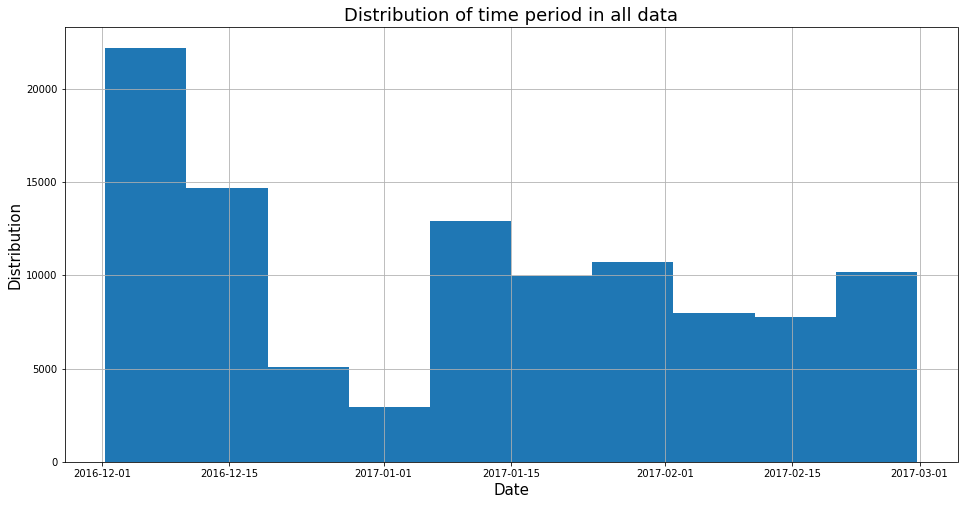

In [28]:
data['purchase_date'].hist(figsize=(16,8))
plt.title('Distribution of time period in all data', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.show()

From the histogram we see that were very active in the begining of December, but closer to the new year, user activity decreases. Some days after holidays user activity returned to normal. 

- How many sessions were per day?

In [29]:
purchases_per_user = data.groupby('date').agg({'customer_id': ['count','nunique']})
purchases_per_user.columns = ['n_purchases', 'n_users']
purchases_per_user['purchases_per_user'] = purchases_per_user['n_purchases'] / purchases_per_user['n_users']
purchases_per_user.head(10)

n_purchases  n_users  purchases_per_user
date                                                
2016-12-01         3063       99           30.939394
2016-12-02         2068      118           17.525424
2016-12-03         2184       56           39.000000
2016-12-05         2619       77           34.012987
2016-12-06         3830       91           42.087912
2016-12-07         2945       71           41.478873
2016-12-08         2607      113           23.070796
2016-12-09         2880      123           23.414634
2016-12-10         2720       55           49.454545
2016-12-12         1395       43           32.441860

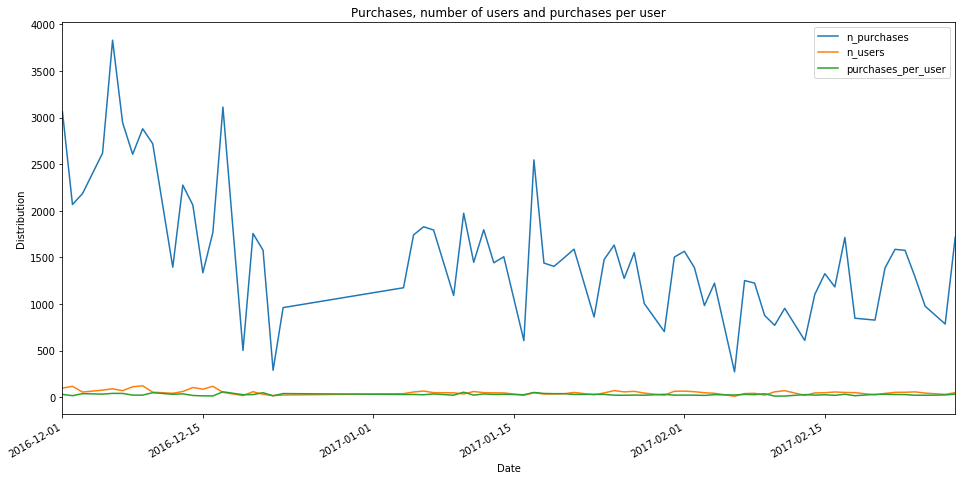

In [30]:
purchases_per_user.plot(figsize=(16,8))
plt.title('Purchases, number of users and purchases per user')
plt.xlabel('Date')
plt.ylabel('Distribution')
plt.show()

In [31]:
purchases_per_user['purchases_per_user'].describe()

count    68.000000
mean     29.800502
std       9.680042
min      13.084746
25%      23.121545
50%      29.234259
75%      34.099740
max      58.716981
Name: purchases_per_user, dtype: float64

In [32]:
purchases_per_user['n_users'].describe()

count     68.000000
mean      53.808824
std       24.570494
min       11.000000
25%       39.750000
50%       50.000000
75%       62.000000
max      123.000000
Name: n_users, dtype: float64

We received that in average each user bought something 29 time per day. From the plot we see that in the begin of December 2016 it was peak of number of purchases. And at the end of December 2016 the number of purchases shrinked a lot and return to the norma after some days in January. The maximum value of purchases is 58 and minimum 13 per day.

#### Per customer analysis per group per week

- Calculate the number of customers who are in loyality program and who are not. Plot the bar chart.

In [33]:
data.head()

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
1      541104   21873         0 2017-01-13 14:29:00     unknown          0   
2      540418   21873         1 2017-01-07 11:04:00     unknown          0   
3      541516   21873         2 2017-01-18 17:34:00     unknown          0   
4      541566   21873        35 2017-01-19 11:50:00       23401          1   

   shop_id       date       week  price  
0   Shop 3 2016-12-10 2016-12-08   0.42  
1   Shop 0 2017-01-13 2017-01-12   0.42  
2   Shop 0 2017-01-07 2017-01-05   0.42  
3   Shop 0 2017-01-18 2017-01-12   0.42  
4  Shop 22 2017-01-19 2017-01-19   0.42

In [34]:
data['loyalty_pr'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [35]:
program = data.groupby('loyalty_pr')['customer_id'].nunique().reset_index()
program

loyalty_pr  customer_id
0          0         1163
1          1          587

In [36]:
fig = px.bar(program, x='loyalty_pr', y='customer_id', title='Proportions of customers who are in or not in the loyalty program', color='loyalty_pr',
            labels={
                'loyalty_pr': 'Loyalty Program',
                'customer_id': 'Count of Customers'
            })
fig.show()

We calculated and ploted how many unique customers who are in loyalty program and who are not.

- How many purchases were made per customer?

In [37]:
purch_per_cust = data.groupby(['week', 'loyalty_pr','customer_id'])['purchase_id'].count().sort_values(ascending=False).reset_index()
purch_per_cust.columns = ['week', 'loyalty_pr', 'customer_id', 'purch_count']
purch_per_cust.head()

week loyalty_pr customer_id  purch_count
0 2016-12-01          0     unknown         6022
1 2017-01-12          0     unknown         4785
2 2016-12-15          0     unknown         4517
3 2016-12-08          0     unknown         4389
4 2017-01-05          0     unknown         3568

In [38]:
purch_per_cust = purch_per_cust[purch_per_cust['customer_id'] != 'unknown']
purch_per_cust.head()

week loyalty_pr customer_id  purch_count
13 2016-12-01          0       18427          302
14 2016-12-01          1       23529          297
15 2016-12-08          0       18427          250
16 2017-02-02          1       23016          245
17 2017-02-09          0       19835          208

In [39]:
purch_per_cust['purch_count'].describe()

count    3246.000000
mean       20.996303
std        23.597041
min         1.000000
25%         6.000000
50%        15.000000
75%        28.000000
max       302.000000
Name: purch_count, dtype: float64

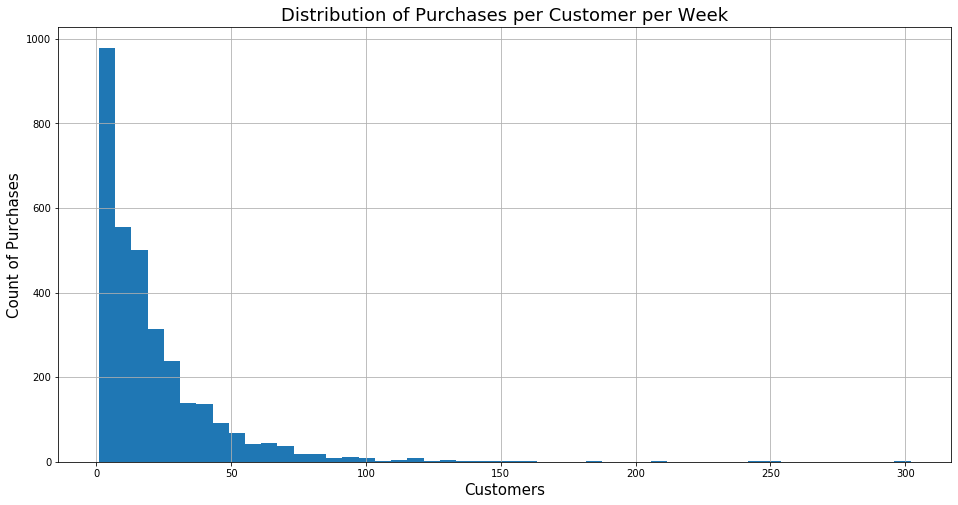

In [40]:
purch_per_cust.hist(bins=50, figsize=(16,8))
plt.title('Distribution of Purchases per Customer per Week', fontsize=18)
plt.xlabel('Customers', fontsize=15)
plt.ylabel('Count of Purchases', fontsize=15)
plt.show()

In [41]:
x0 = purch_per_cust.loc[purch_per_cust['loyalty_pr'] == 0, 'purch_count']
x1 = purch_per_cust.loc[purch_per_cust['loyalty_pr'] == 1, 'purch_count']

fig = go.Figure(layout_title_text="Distribution of Purchases per Customer per Week")
fig.add_trace(go.Histogram(x=x0, nbinsx=50, name='not loyalty program'))
fig.add_trace(go.Histogram(x=x1, nbinsx=50, name='loyalty program'))

fig.update_layout(barmode='stack')
fig.show()

We calculated how much each customer have bought some item per week. We dropped all customers that are 'unknown', because they distort our ddistribution. From the histogram we see that many customers buy no more than 10-15 items per week, but we have also values more than 100. These customers could be workers of construction companies. So they could buy a lot of items per week.

- What is the average quantity of purchases per customer?

In [42]:
quantity = data.groupby(['week', 'loyalty_pr', 'customer_id'])['quantity'].mean().sort_values(ascending=False).reset_index()
quantity.columns = ['week', 'loyalty_pr', 'customer_id', 'avg_quantity']
quantity = quantity[quantity['customer_id'] != 'unknown']
quantity.head()

week loyalty_pr customer_id  avg_quantity
0 2017-02-16          1       23766        3905.0
1 2017-02-09          0       21708        2399.0
2 2017-02-16          0       20288        2399.0
3 2016-12-01          1       22433        2139.0
4 2017-01-05          0       21428        1801.8

In [43]:
quantity['avg_quantity'].describe()

count    3246.000000
mean       22.261489
std       135.238298
min     -2203.500000
25%         2.424451
50%         7.454545
75%        13.555556
max      3905.000000
Name: avg_quantity, dtype: float64

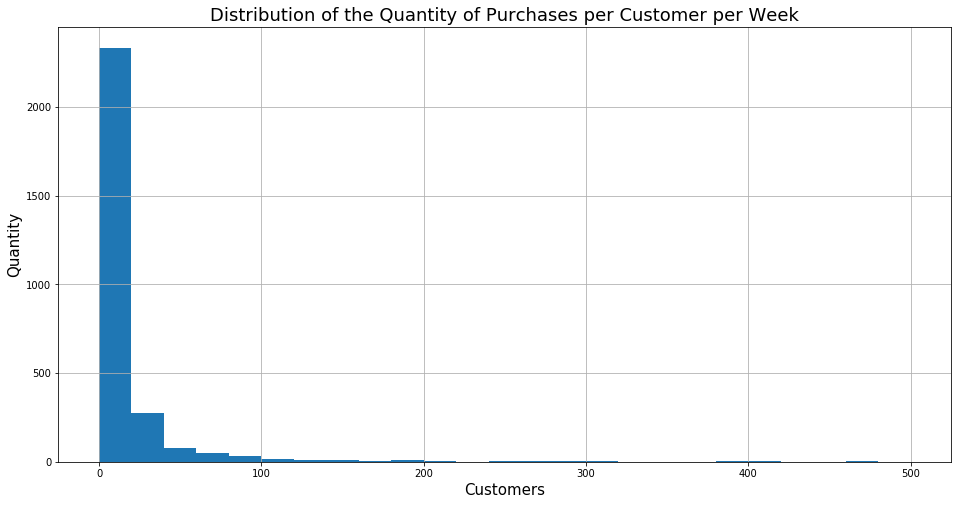

In [44]:
quantity.hist(bins=25, figsize=(16,8), range=(0,500))
plt.title('Distribution of the Quantity of Purchases per Customer per Week', fontsize=18)
plt.xlabel('Customers', fontsize=15)
plt.ylabel('Quantity', fontsize=15)
plt.show()

In [45]:
x0 = quantity.loc[quantity['loyalty_pr'] == 0, 'avg_quantity']
x1 = quantity.loc[quantity['loyalty_pr'] == 1, 'avg_quantity']

fig = go.Figure(layout_title_text="Distribution of the Quantity of Purchases per Customer per Week")
fig.add_trace(go.Histogram(x=x0, nbinsx=30, name='not loyalty program'))
fig.add_trace(go.Histogram(x=x1, nbinsx=30, name='loyalty program'))

fig.update_layout(barmode='stack')
fig.show()

We calculated the quantity of each purchase for each customer per week. From this table we can say that normaly the quantity of purchases is no more than 20-30 items. But also we have big purchases. There are more customers who are in loyalty program and they bought more items.

- Average revenue per customer.

In [46]:
data.head()

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
1      541104   21873         0 2017-01-13 14:29:00     unknown          0   
2      540418   21873         1 2017-01-07 11:04:00     unknown          0   
3      541516   21873         2 2017-01-18 17:34:00     unknown          0   
4      541566   21873        35 2017-01-19 11:50:00       23401          1   

   shop_id       date       week  price  
0   Shop 3 2016-12-10 2016-12-08   0.42  
1   Shop 0 2017-01-13 2017-01-12   0.42  
2   Shop 0 2017-01-07 2017-01-05   0.42  
3   Shop 0 2017-01-18 2017-01-12   0.42  
4  Shop 22 2017-01-19 2017-01-19   0.42

In [47]:
data['revenue'] = data['quantity'] * data['price']
data.head()

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
1      541104   21873         0 2017-01-13 14:29:00     unknown          0   
2      540418   21873         1 2017-01-07 11:04:00     unknown          0   
3      541516   21873         2 2017-01-18 17:34:00     unknown          0   
4      541566   21873        35 2017-01-19 11:50:00       23401          1   

   shop_id       date       week  price  revenue  
0   Shop 3 2016-12-10 2016-12-08   0.42     4.62  
1   Shop 0 2017-01-13 2017-01-12   0.42     0.00  
2   Shop 0 2017-01-07 2017-01-05   0.42     0.42  
3   Shop 0 2017-01-18 2017-01-12   0.42     0.84  
4  Shop 22 2017-01-19 2017-01-19   0.42    14.70

To calculate revenue we sum the quantity of purchased items with the price for each item. 

In [48]:
data['quantity'].describe()

count    104302.000000
mean          7.883003
std         329.565540
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: quantity, dtype: float64

In [49]:
data[data['quantity'] < 0].count()

purchase_id      2076
item_id          2076
quantity         2076
purchase_date    2076
customer_id      2076
loyalty_pr       2076
shop_id          2076
date             2076
week             2076
price            2076
revenue          2076
dtype: int64

We have negative values (2076) in the 'quantity' column, so we can suppose that these values are refunds. So we can not delete them, but just keep in mind that there were refunds.

In [50]:
avg_cust_rev = data.groupby(['loyalty_pr', 'customer_id'])['revenue'].mean().sort_values(ascending=False).reset_index()
avg_cust_rev.head(10)

loyalty_pr customer_id      revenue
0          0       18434  3791.850000
1          0       21428  2047.090000
2          1       23781  1355.190417
3          1       23766  1053.763333
4          1       22433  1000.580000
5          0       18949   587.050000
6          1       22012   574.992500
7          1       22970   543.150000
8          0       19632   498.750000
9          0       20978   453.450000

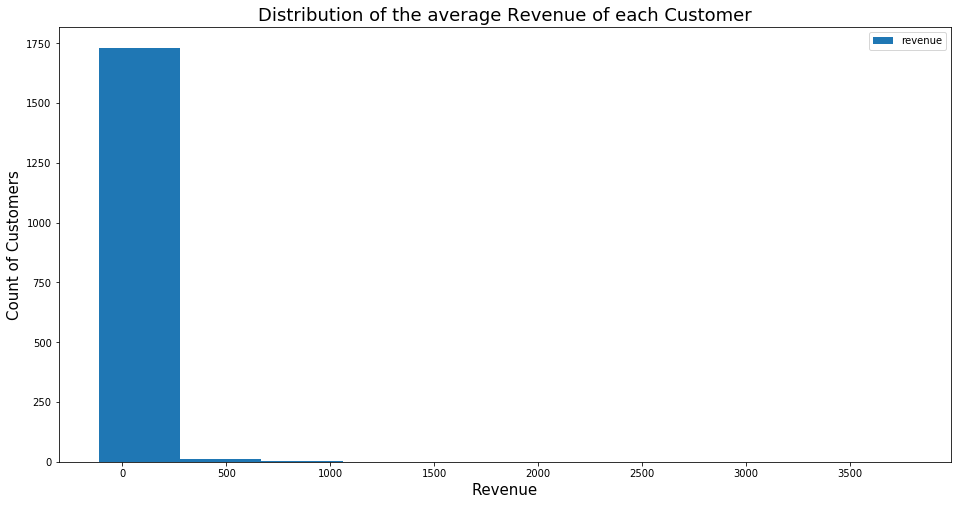

In [51]:
avg_cust_rev.plot(kind='hist', figsize=(16,8))
plt.title('Distribution of the average Revenue of each Customer', fontsize=18)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Count of Customers', fontsize=15)
plt.show()

In [52]:
x0 = avg_cust_rev.loc[avg_cust_rev['loyalty_pr'] == 0, 'revenue']
x1 = avg_cust_rev.loc[avg_cust_rev['loyalty_pr'] == 1, 'revenue']

fig = go.Figure(layout_title_text="Distribution of the average Revenue of each Customer")
fig.add_trace(go.Histogram(x=x0, nbinsx=30, name='not loyalty program'))
fig.add_trace(go.Histogram(x=x1, nbinsx=30, name='loyalty program'))

fig.update_layout(barmode='stack')
fig.show()

In [53]:
avg_cust_rev['revenue'].describe()

count    1750.000000
mean       23.363234
std       121.575195
min      -110.500000
25%         4.314254
50%         9.275232
75%        14.134119
max      3791.850000
Name: revenue, dtype: float64

We calculated the average revenue per customer. We see that a lot of customers buy items around from 0 to 250. But we have also customers who payed more than 3000. Those are customer who are not in loyaly program.

In [54]:
per_week_cust_rev = data.groupby(['loyalty_pr', 'week', 'customer_id'])['revenue'].mean().sort_values(ascending=False).reset_index()
per_week_cust_rev.head(10)

loyalty_pr       week customer_id      revenue
0          0 2016-12-08       18434  3791.850000
1          1 2017-02-16       23766  3202.100000
2          0 2017-02-09       21708  2255.060000
3          0 2017-01-05       21428  2047.090000
4          1 2017-02-02       23781  1751.578333
5          1 2016-12-01       23781  1295.005882
6          0 2017-02-23       21448  1289.050000
7          1 2016-12-01       22433  1000.580000
8          1 2017-02-09       22012   991.700000
9          0 2017-01-12       18668   808.750000

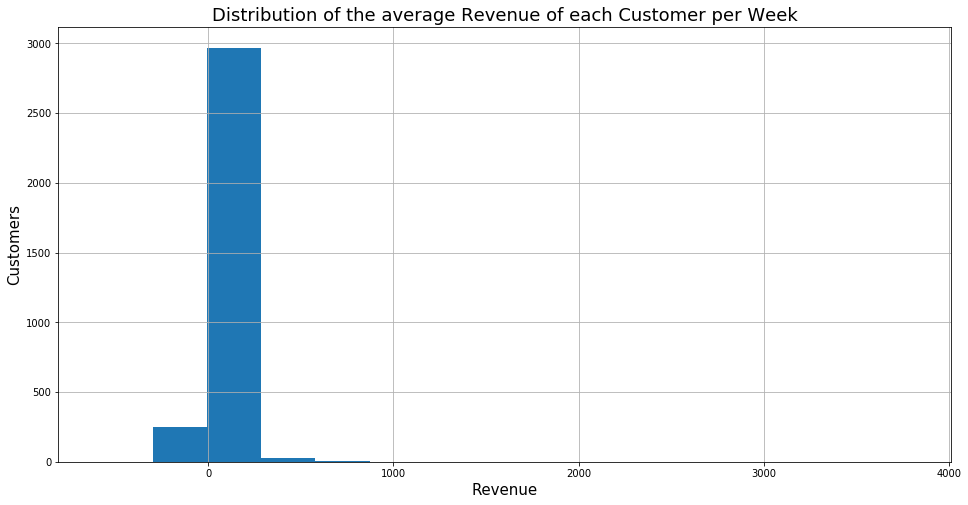

In [55]:
per_week_cust_rev.hist(bins=15, figsize=(16,8))
plt.title('Distribution of the average Revenue of each Customer per Week', fontsize=18)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Customers', fontsize=15)
plt.show()

In [56]:
x0 = per_week_cust_rev.loc[per_week_cust_rev['loyalty_pr'] == 0, 'revenue']
x1 = per_week_cust_rev.loc[per_week_cust_rev['loyalty_pr'] == 1, 'revenue']

fig = go.Figure(layout_title_text="Distribution of the average Revenue of each Customer per Week")
fig.add_trace(go.Histogram(x=x0, nbinsx=30, name='not loyalty program'))
fig.add_trace(go.Histogram(x=x1, nbinsx=30, name='loyalty program'))

fig.update_layout(barmode='stack')
fig.show()

We calculated the average revenue per week per each customer. From the histogram we see that we have values under null. As we sayed we have negative values that could be refunds. The distribution is clear, a lot of people buy for a small amount per week, but also we have someone who brings buy for more than 1000.

- Calculate revenue and users per week

In [57]:
rev_per_week = data.groupby(['week', 'loyalty_pr']).agg({'customer_id': pd.Series.nunique, 'revenue':'sum'})
rev_per_week.columns = ['users_count', 'revenue']
rev_per_week

users_count   revenue
week       loyalty_pr                       
2016-12-01 0                   292  88802.61
           1                   161  55917.20
2016-12-08 0                   269  87103.53
           1                   162  27738.82
2016-12-15 0                   207  71221.71
           1                   110  22177.74
2016-12-22 0                    32   7214.12
           1                     9   1151.98
2016-12-29 0                    27   5496.11
           1                    12   2491.79
2017-01-05 0                   203  84973.48
           1                    73  22645.31
2017-01-12 0                   158  67093.07
           1                    65  11343.44
2017-01-19 0                   170  68890.22
           1                    75  11101.55
2017-01-26 0                   192  40741.72
           1                    89  23652.81
2017-02-02 0                   150  35065.77
           1                    78  31399.85
2017-02-09 0                   158  59239.15
           1                    88  14253.81
2017-02-16 0                   170  62777.88
           1                    84  22800.18
2017-02-23 0                   156  35301.08
           1                    69  14851.13

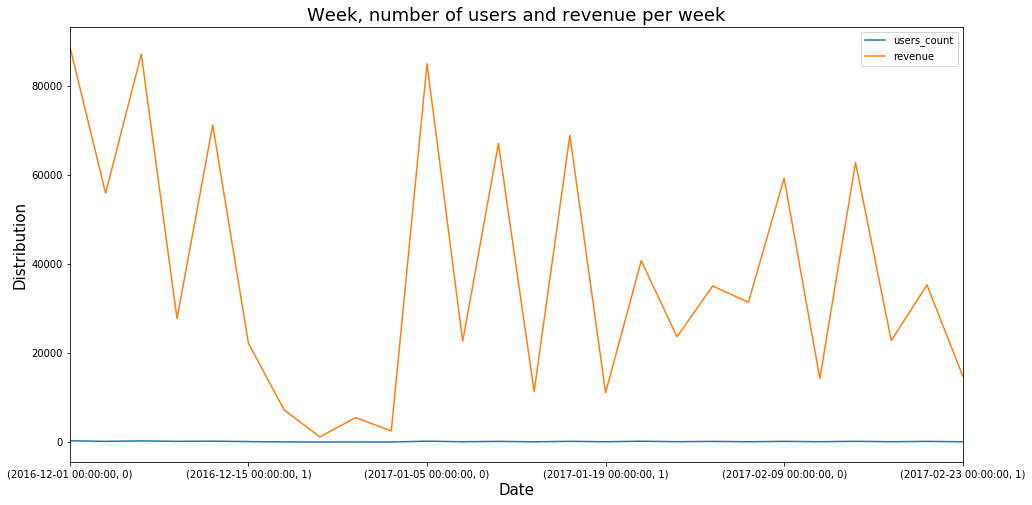

In [58]:
rev_per_week.plot(figsize=(16,8))
plt.title('Week, number of users and revenue per week', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.show()

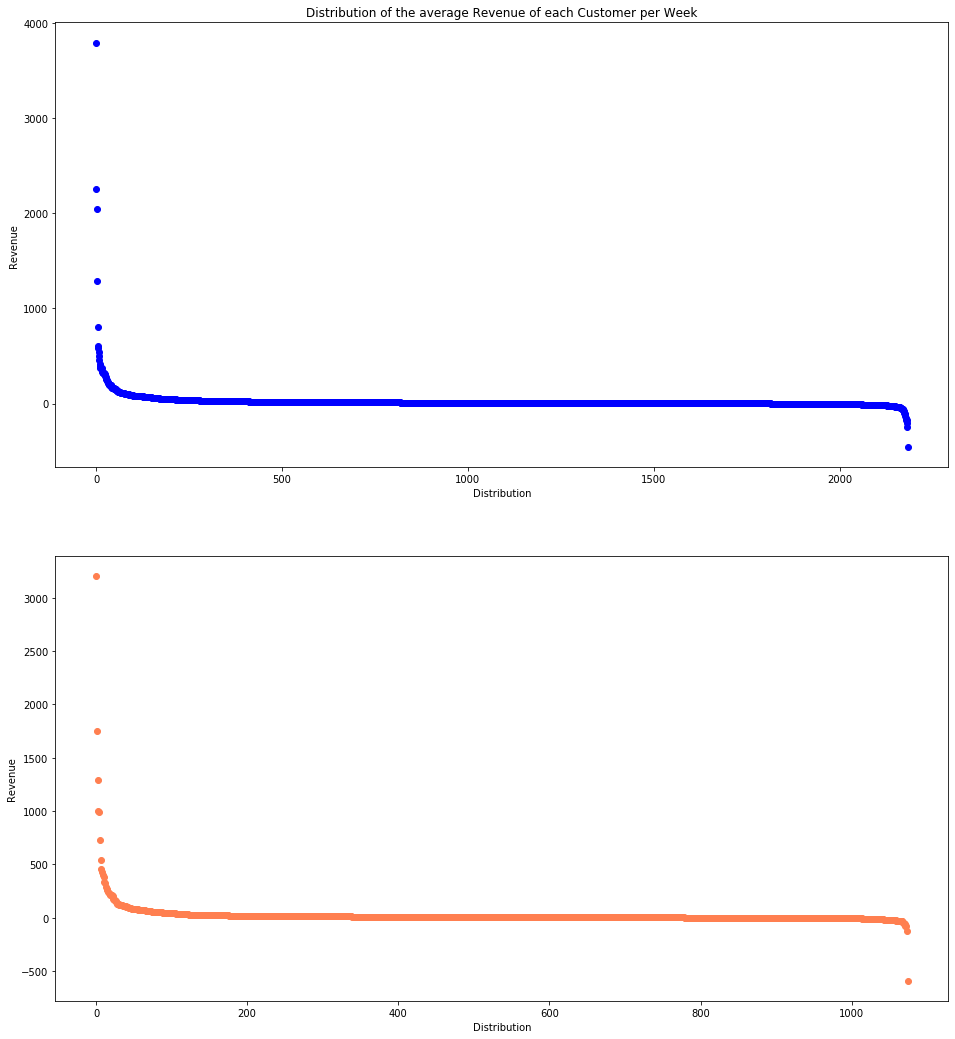

In [59]:
x_valuesA = pd.Series(range(0,len(per_week_cust_rev[per_week_cust_rev['loyalty_pr'] == 0]['revenue'])))
x_valuesB = pd.Series(range(0,len(per_week_cust_rev[per_week_cust_rev['loyalty_pr'] == 1]['revenue'])))
fig, ax = plt.subplots(2, figsize=(16,18))
ax[0].scatter(x_valuesA, per_week_cust_rev[per_week_cust_rev['loyalty_pr'] == 0]['revenue'], c='blue')
ax[0].set_title('Distribution of the average Revenue of each Customer per Week')
ax[0].set_xlabel('Distribution')
ax[0].set_ylabel('Revenue')
ax[1].scatter(x_valuesB, per_week_cust_rev[per_week_cust_rev['loyalty_pr'] == 1]['revenue'], c='coral')
ax[1].set_xlabel('Distribution')
ax[1].set_ylabel('Revenue')
plt.show()

From this plot we see that the revenue was very hight till 22 December, but between 22 and 29 it was very low. After the beginning of January arrived began to grow.

- Average revenue per purchase per customer.

In [60]:
rev_per_purch = data.groupby(['week', 'customer_id']).agg({'purchase_id':'nunique',
                                                          'revenue':'mean'}).reset_index()
rev_per_purch.columns = ['week', 'customer_id', 'purchase_count', 'revenue']
rev_per_purch = rev_per_purch[rev_per_purch['customer_id'] != 'unknown']
rev_per_purch['avg_rev_per_purch'] = rev_per_purch['revenue'] / rev_per_purch['purchase_count']
rev_per_purch.sort_values(by='avg_rev_per_purch', ascending=False).head(10)

week customer_id  purchase_count      revenue  avg_rev_per_purch
476  2016-12-08       18434               1  3791.850000        3791.850000
3019 2017-02-16       23766               1  3202.100000        3202.100000
2681 2017-02-09       21708               1  2255.060000        2255.060000
3167 2017-02-23       21448               1  1289.050000        1289.050000
1458 2017-01-05       21428               2  2047.090000        1023.545000
317  2016-12-01       22433               1  1000.580000        1000.580000
2691 2017-02-09       22012               1   991.700000         991.700000
2526 2017-02-02       23781               2  1751.578333         875.789167
1591 2017-01-12       18668               1   808.750000         808.750000
2232 2017-01-26       22395               1   726.750000         726.750000

In [61]:
x = rev_per_purch['avg_rev_per_purch']

fig = go.Figure(data=[go.Histogram(x=x, nbinsx=25)], 
                layout_title_text="Average revenue per purchase per customer")
fig.show()

From this table we see the average revenue per purchase.

- Cumulative revenue 

First we'll build an array with unique paired date-group values using the drop_duplicates() method.

In [62]:
dates_groups = data[['date','loyalty_pr']].drop_duplicates() 
dates_groups.head()

date loyalty_pr
0 2016-12-10          0
1 2017-01-13          0
2 2017-01-07          0
3 2017-01-18          0
4 2017-01-19          1

In [63]:
cum_pivot = data.pivot_table(index='week',
                            columns='loyalty_pr',
                            values='revenue',
                            aggfunc='sum')
cum_pivot.head(10)

loyalty_pr         0         1
week                          
2016-12-01  88802.61  55917.20
2016-12-08  87103.53  27738.82
2016-12-15  71221.71  22177.74
2016-12-22   7214.12   1151.98
2016-12-29   5496.11   2491.79
2017-01-05  84973.48  22645.31
2017-01-12  67093.07  11343.44
2017-01-19  68890.22  11101.55
2017-01-26  40741.72  23652.81
2017-02-02  35065.77  31399.85

In [64]:
cumulative_revenue = cum_pivot.cumsum(axis=0)
cumulative_revenue

loyalty_pr          0          1
week                            
2016-12-01   88802.61   55917.20
2016-12-08  175906.14   83656.02
2016-12-15  247127.85  105833.76
2016-12-22  254341.97  106985.74
2016-12-29  259838.08  109477.53
2017-01-05  344811.56  132122.84
2017-01-12  411904.63  143466.28
2017-01-19  480794.85  154567.83
2017-01-26  521536.57  178220.64
2017-02-02  556602.34  209620.49
2017-02-09  615841.49  223874.30
2017-02-16  678619.37  246674.48
2017-02-23  713920.45  261525.61

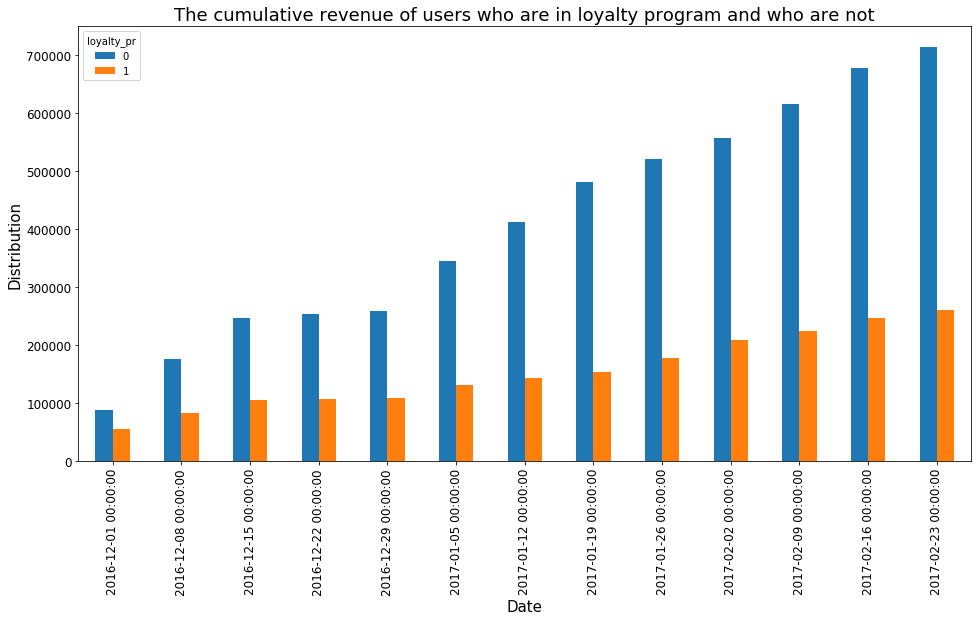

In [65]:
cumulative_revenue.plot(kind='bar', figsize=(16,8), fontsize=12)
plt.title('The cumulative revenue of users who are in loyalty program and who are not', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.show()

From the graph we see that the customers who are not members of the loyalty program bring more revenue to the company  unlike to members.

#### Per shop analysis per group per week

- How many stores are there?

In [66]:
data.head()

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
1      541104   21873         0 2017-01-13 14:29:00     unknown          0   
2      540418   21873         1 2017-01-07 11:04:00     unknown          0   
3      541516   21873         2 2017-01-18 17:34:00     unknown          0   
4      541566   21873        35 2017-01-19 11:50:00       23401          1   

   shop_id       date       week  price  revenue  
0   Shop 3 2016-12-10 2016-12-08   0.42     4.62  
1   Shop 0 2017-01-13 2017-01-12   0.42     0.00  
2   Shop 0 2017-01-07 2017-01-05   0.42     0.42  
3   Shop 0 2017-01-18 2017-01-12   0.42     0.84  
4  Shop 22 2017-01-19 2017-01-19   0.42    14.70

In [67]:
data['shop_id'].nunique()

31

There are 31 shops of building-material retailer company.

- Revenue per store for all time

In [68]:
rev_per_store = data.groupby(['shop_id', 'loyalty_pr'])['revenue'].sum().sort_values(ascending=False).reset_index()
rev_per_store.head(10)

shop_id loyalty_pr    revenue
0  Shop 15          0  103029.07
1   Shop 0          0   98382.34
2   Shop 5          0   47507.37
3   Shop 4          0   33891.57
4  Shop 20          0   31724.15
5  Shop 13          0   30110.92
6  Shop 25          0   27445.29
7  Shop 28          0   25612.18
8  Shop 10          0   25121.08
9  Shop 30          0   22425.05

In [69]:
fig = px.bar(rev_per_store, x='shop_id', y='revenue',
            title='The revenue for each store for all the time',
            color='loyalty_pr',
            labels={
                'shop_id': "Shop's name",
                'revenue': 'Revenue'
            })
fig.show()

Most profitable shops are shops 15, 0 and 5. But we see that in Shop 21 there are some problems with profit. We can assume that in this store is processing returns.

- Average revenue per store.

In [70]:
avg_rev_per_store = data.groupby(['week', 'shop_id'])['revenue'].mean().sort_values(ascending=False).reset_index()
avg_rev_per_store.head(10)

week  shop_id     revenue
0 2016-12-22  Shop 23  498.750000
1 2017-01-12  Shop 15  311.808450
2 2017-01-05  Shop 20  119.405565
3 2017-01-12   Shop 5  118.287500
4 2017-02-09  Shop 23   90.688397
5 2016-12-01  Shop 29   59.596570
6 2017-02-09  Shop 14   59.159429
7 2017-01-05   Shop 6   56.538333
8 2017-01-19  Shop 30   56.535820
9 2017-02-02  Shop 26   52.246904

The average revenue of "Shop 23" in December was the biggest one for all weeks. Also the Shop 15, 20 and 5 were popular in January.

In [71]:
per_store_not_loyl = data[data['loyalty_pr'] == 0].pivot_table(index='shop_id',
                                columns='week',
                                values='revenue',
                                aggfunc='mean')
per_store_not_loyl = per_store_not_loyl.fillna(0)
per_store_not_loyl.head()

week     2016-12-01  2016-12-08  2016-12-15  2016-12-22  2016-12-29  \
shop_id                                                               
Shop 0     3.434083    3.221948    2.647936    3.155015    3.741089   
Shop 1     4.668283    7.824091   10.293904    0.000000   13.975385   
Shop 10   18.351239   10.007510    8.551045   17.397143    3.211176   
Shop 11    6.574279   10.883916   11.001087   10.460789    4.752000   
Shop 12    6.618010   15.139403   14.007303    6.724667    0.000000   

week     2017-01-05  2017-01-12  2017-01-19  2017-01-26  2017-02-02  \
shop_id                                                               
Shop 0     2.537749    2.437069    2.386256    1.989994    2.025321   
Shop 1    30.226963   16.791429    7.477965   15.431529    4.767097   
Shop 10    7.424831   17.268733   16.525714   18.146029   15.796970   
Shop 11    8.797246   24.038136   28.446667   26.756591   13.729677   
Shop 12   25.531250   10.900172    8.021905    3.549133   10.340000   

week     2017-02-09  2017-02-16  2017-02-23  
shop_id                                      
Shop 0     1.572831    1.923437    1.872722  
Shop 1     0.449808   16.523522    4.385471  
Shop 10   34.569692   10.840167   15.893462  
Shop 11   12.863333   12.171660    7.025400  
Shop 12    1.485614    7.657368   12.020494

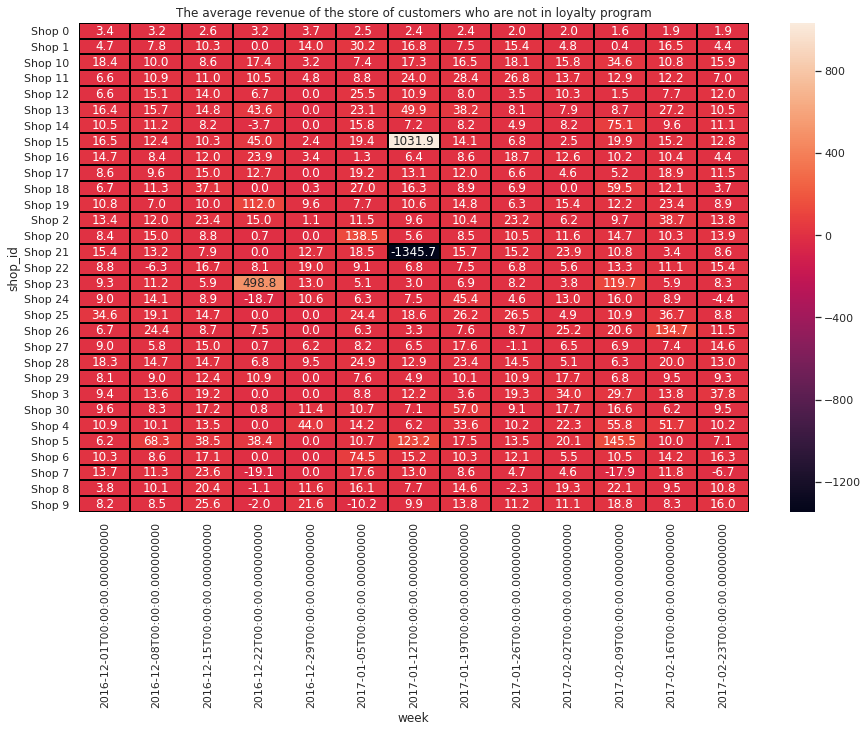

In [72]:
sns.set(style='dark')
plt.figure(figsize=(15, 9))
plt.title('The average revenue of the store of customers who are not in loyalty program')
sns.heatmap(per_store_not_loyl, annot=True, fmt='.1f', linewidths=1, linecolor='black'); 

In [73]:
per_store_loyl = data[data['loyalty_pr'] == 1].pivot_table(index='shop_id',
                                columns='week',
                                values='revenue',
                                aggfunc='mean')
per_store_loyl = per_store_loyl.fillna(0)
per_store_loyl.head()

week     2016-12-01  2016-12-08  2016-12-15  2016-12-22  2016-12-29  \
shop_id                                                               
Shop 0     6.989173    2.296848   10.249831         0.0   21.535909   
Shop 1     7.863370   13.465238    5.574630         0.0    0.000000   
Shop 10    8.004072    5.268000    4.589406         0.0    0.000000   
Shop 11    7.849630    5.346423   14.536698         0.0    0.000000   
Shop 12    4.588636   14.175105   18.438485         0.0    0.000000   

week     2017-01-05  2017-01-12  2017-01-19  2017-01-26  2017-02-02  \
shop_id                                                               
Shop 0    10.362442    5.563118    7.154364    6.700935    0.000000   
Shop 1    29.158824   10.177745    7.711077    4.260476    2.772764   
Shop 10    0.811000   14.625000   10.864146    1.598367   42.824138   
Shop 11    0.000000    4.694174    5.577955    9.759733    8.338000   
Shop 12   60.286842   10.889000    4.586712   15.087143   -3.375000   

week     2017-02-09  2017-02-16  2017-02-23  
shop_id                                      
Shop 0     9.174559    3.587500   16.834130  
Shop 1    22.812500    3.572467    7.557159  
Shop 10  -19.087500   12.438000   15.628710  
Shop 11    1.738000   19.091071    9.049605  
Shop 12   34.592500    2.288889    9.262500

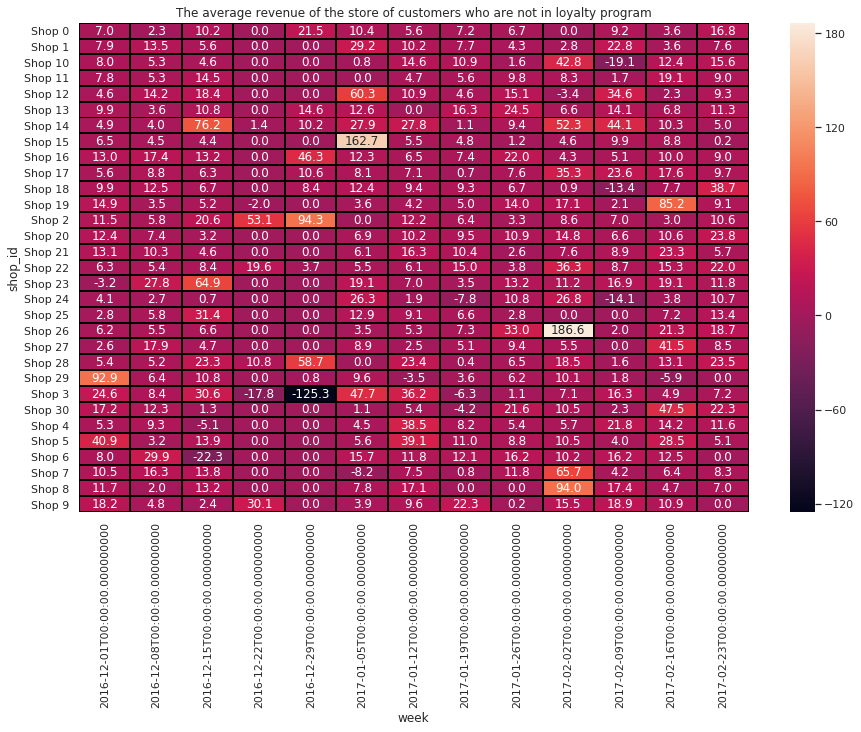

In [74]:
sns.set(style='dark')
plt.figure(figsize=(15, 9))
plt.title('The average revenue of the store of customers who are not in loyalty program')
sns.heatmap(per_store_loyl, annot=True, fmt='.1f', linewidths=1, linecolor='black'); 

We ploted two heatmaps of the average revenue for each store per week for customers who are not in the loyalty program and who are not in. Light values shows the best results.

- The number of purchases per store.

In [75]:
data = data[data['customer_id'] != 'unknown']
purch_per_store = data.groupby('shop_id')['purchase_id'].count().sort_values(ascending=False).reset_index()
purch_per_store.columns = ['shop_id', 'count_of_purch']
purch_per_store

shop_id  count_of_purch
0    Shop 1            2689
1   Shop 15            2679
2   Shop 24            2624
3   Shop 22            2538
4    Shop 5            2469
5    Shop 9            2447
6   Shop 13            2411
7   Shop 20            2402
8   Shop 14            2366
9   Shop 30            2359
10   Shop 0            2351
11   Shop 7            2311
12  Shop 28            2306
13  Shop 26            2299
14  Shop 27            2296
15  Shop 11            2274
16   Shop 2            2224
17  Shop 19            2209
18  Shop 29            2181
19  Shop 10            2181
20  Shop 17            2164
21  Shop 23            2039
22  Shop 18            1995
23   Shop 4            1964
24   Shop 8            1963
25  Shop 16            1920
26  Shop 25            1849
27  Shop 12            1758
28   Shop 3            1703
29  Shop 21            1637
30   Shop 6            1546

In [76]:
fig = px.bar(purch_per_store, x='shop_id', y='count_of_purch',
            title='Number of purchases in each store',
            labels={
                'shop_id': "Shop's name",
                'count_of_purch': 'Revenue'
            })
fig.show()

The biggest number of purchases is in the shop . There are 2689 purchases. The distribution of sales is almost good per each shop.

- Quantity of purchased items by store.

In [77]:
data.head()

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
4      541566   21873        35 2017-01-19 11:50:00       23401          1   
5      538843   21873         1 2016-12-14 13:18:00       21712          0   
6      540838   21873        11 2017-01-11 15:13:00       19541          0   
7      543592   21873         5 2017-02-10 11:57:00       22922          1   

   shop_id       date       week  price  revenue  
0   Shop 3 2016-12-10 2016-12-08   0.42     4.62  
4  Shop 22 2017-01-19 2017-01-19   0.42    14.70  
5   Shop 9 2016-12-14 2016-12-08   0.42     0.42  
6   Shop 4 2017-01-11 2017-01-05   0.42     4.62  
7  Shop 15 2017-02-10 2017-02-09   0.42     2.10

In [78]:
quantity_of_purch = data.groupby(['week', 'shop_id'])['quantity'].sum().sort_values(ascending=False).reset_index()
quantity_of_purch.head(10)

week  shop_id  quantity
0 2017-01-12  Shop 15     76716
1 2017-01-05  Shop 15     10518
2 2017-01-05  Shop 20      9909
3 2017-01-19   Shop 4      9680
4 2017-02-16   Shop 4      9594
5 2017-02-09  Shop 23      9408
6 2017-01-12  Shop 13      9165
7 2016-12-15  Shop 18      8625
8 2017-02-09   Shop 9      8246
9 2017-02-02  Shop 24      7699

In [79]:
quantity_of_purch_pivot = data.pivot_table(index='shop_id',
                                          columns='week',
                                          values='quantity',
                                          aggfunc='count')
quantity_of_purch_pivot = quantity_of_purch_pivot.fillna(0)
quantity_of_purch_pivot.head()

week     2016-12-01  2016-12-08  2016-12-15  2016-12-22  2016-12-29  \
shop_id                                                               
Shop 0        355.0       225.0       276.0         2.0        57.0   
Shop 1        325.0       219.0       200.0         0.0        13.0   
Shop 10       498.0       357.0       168.0         7.0        34.0   
Shop 11       343.0       280.0       244.0        38.0        15.0   
Shop 12       279.0       508.0       122.0        15.0         0.0   

week     2017-01-05  2017-01-12  2017-01-19  2017-01-26  2017-02-02  \
shop_id                                                               
Shop 0        172.0       215.0       137.0       307.0       136.0   
Shop 1        152.0       137.0       178.0       169.0       461.0   
Shop 10       188.0       154.0        62.0       234.0        62.0   
Shop 11       138.0       174.0        62.0       119.0       165.0   
Shop 12        86.0        68.0        94.0       229.0        91.0   

week     2017-02-09  2017-02-16  2017-02-23  
shop_id                                      
Shop 0        177.0        97.0       195.0  
Shop 1         56.0       468.0       311.0  
Shop 10       199.0       135.0        83.0  
Shop 11       147.0       297.0       252.0  
Shop 12        73.0        56.0       137.0

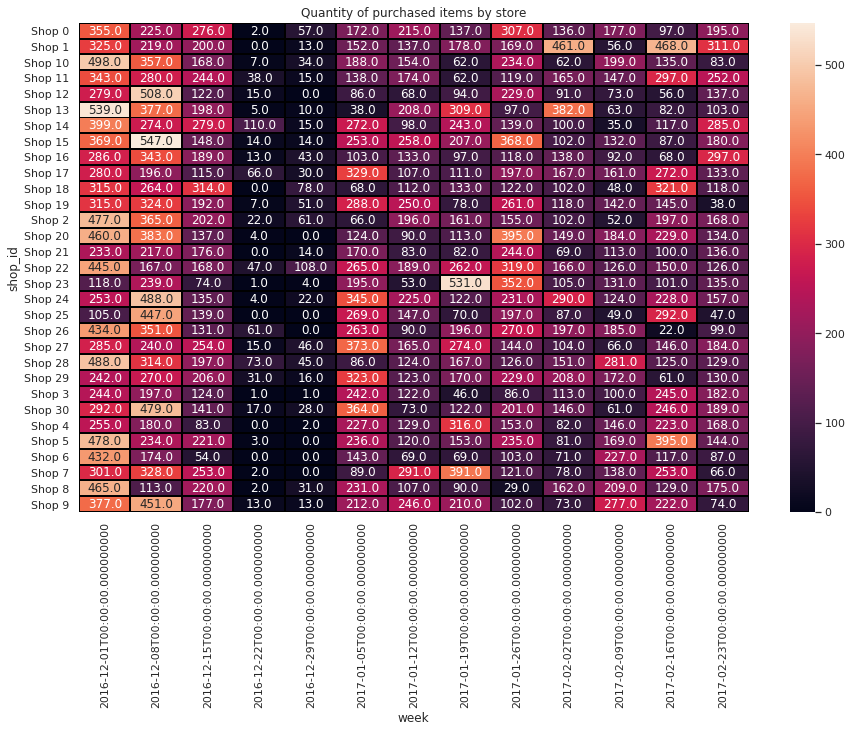

In [80]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 9))
plt.title('Quantity of purchased items by store')
sns.heatmap(quantity_of_purch_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='black'); 

We calculated the quantity of purchased items by store. we can see that shop 0 is the leaer of sales. Also we see that in period of 22 December - 05 January it were the smallest sales of all period.

**Cnclusion**

In this part of the project we carried out exploratory data analysis. We calculated all main metrics. Determined the time period of all dataset, looked at purchases made, look at count of purchases, discovered the best shops, looked at rvenue for each shop and also revenue from each customer. We ploted a lot of graphs and described them.

## Step 4. Testing hypothesis

### The average revenue from customers of loyality group and not-loyality group differs.

In [81]:
data.head()

purchase_id item_id  quantity       purchase_date customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00       18427          0   
4      541566   21873        35 2017-01-19 11:50:00       23401          1   
5      538843   21873         1 2016-12-14 13:18:00       21712          0   
6      540838   21873        11 2017-01-11 15:13:00       19541          0   
7      543592   21873         5 2017-02-10 11:57:00       22922          1   

   shop_id       date       week  price  revenue  
0   Shop 3 2016-12-10 2016-12-08   0.42     4.62  
4  Shop 22 2017-01-19 2017-01-19   0.42    14.70  
5   Shop 9 2016-12-14 2016-12-08   0.42     0.42  
6   Shop 4 2017-01-11 2017-01-05   0.42     4.62  
7  Shop 15 2017-02-10 2017-02-09   0.42     2.10

In [82]:
data['customer_id'] = data['customer_id'].astype('int')

Before testing hypotheses we deleted all unknown customers, because they can be both in two test groups. 

In [83]:
avg_rev_per_cust = data.groupby(['loyalty_pr', 'week']).agg({'customer_id': 'nunique',
                                                  'revenue':'sum'}).sort_values(by='revenue', ascending=False).reset_index()
avg_rev_per_cust.columns = ['loyalty_pr', 'week', 'users_count', 'revenue']
avg_rev_per_cust['avg_rev'] = avg_rev_per_cust['revenue'] / avg_rev_per_cust['users_count']
avg_rev_per_cust.head()

loyalty_pr       week  users_count   revenue     avg_rev
0          0 2017-01-05          202  76359.86  378.019109
1          0 2016-12-08          268  75041.54  280.005746
2          0 2016-12-01          291  73304.19  251.904433
3          0 2016-12-15          206  62070.84  301.314757
4          0 2017-01-19          169  60501.21  357.995325

We calculated average revenue per customer per week for our test. We'll use ttes_ind for testing hypotheses. 

In this step we have to test:

H₀ "The average revenue from customers of loyality group and not-loyality group are equal."

The alternative hypothesis, H₁, is based on H₀.

H₁ would be, "The average revenue from customers of loyality group and not-loyality group differs."

For testing null hypothesis we have call st.ttest_ind() method from scipy library and take a sample of calling plans .loc. And we'll choose 0.05 critical statistical significance level. So if p-value will be less than statistical significance level we'll reject the null hypothesis. Another way we can't reject the null hypothesis.

In [84]:
alpha = .05
results = st.ttest_ind(avg_rev_per_cust.loc[avg_rev_per_cust['loyalty_pr'] == 0, 'avg_rev'],
                       avg_rev_per_cust.loc[avg_rev_per_cust['loyalty_pr'] == 1, 'avg_rev'])

print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis") 
else:
    print("We can't reject the null hypothesis") 

p-value: 0.172251436827816
We can't reject the null hypothesis


From the test we received that our p-value greater than alpha parameter.The average revenue from customers of loyality group and not-loyality group are equal.

### The average purchase size from customers of loyality group and not-loyality group differs.

In [85]:
avg_purch_size = data.groupby(['loyalty_pr', 'week']).agg({'customer_id': 'nunique',
                                                  'purchase_id':'count'}).sort_values(by='purchase_id', ascending=False).reset_index()
avg_purch_size.columns = ['loyalty_pr', 'week', 'users_count', 'purch_count']
avg_purch_size['avg_purch_size'] = avg_purch_size['purch_count'] / avg_purch_size['users_count']
avg_purch_size.head()

loyalty_pr       week  users_count  purch_count  avg_purch_size
0          0 2016-12-01          291         6528       22.432990
1          0 2016-12-08          268         5927       22.115672
2          0 2017-01-05          202         4628       22.910891
3          1 2016-12-01          161         4159       25.832298
4          0 2017-01-26          191         3841       20.109948

Here we calculated the average purchase size of customers per week.

H₀ "The average purchase size from customers of loyality group and not-loyality group are equal."

The alternative hypothesis, H₁, is based on H₀.

H₁ would be, "The average purchase size from customers of loyality group and not-loyality group differs"

In [86]:
alpha = .05
results = st.ttest_ind(avg_purch_size.loc[avg_purch_size['loyalty_pr'] == 0, 'avg_purch_size'],
                       avg_purch_size.loc[avg_purch_size['loyalty_pr'] == 1, 'avg_purch_size'])
print(results)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis") 
else:
    print("We can't reject the null hypothesis") 

Ttest_indResult(statistic=-1.0415109192097673, pvalue=0.30801721581547536)
p-value: 0.30801721581547536
We can't reject the null hypothesis


From the second test we received that our pvalue also greater than alpha parameter. We can conclude that purchase size of two groups is equal. 

**Conclusion** 

In this part we tested two hypothesis. We used the 'ttest'. P-values from to tests were greater than alpha parameter. 

## Step 5. Overall Conclusion

For this project we have data on purchases made at the building-material retailer Home World. We had two datasets with prices on items and general information about customers, shops, purchase date and quantity of purchased items with item's id. We read the general information about two datasets, cleared and changed all datatypes in needed formats. Then we merged two tables and began exploratory data analysis.

From the exploratory data analysis we know:
- data covers the time period from 01.12.2016 to 02.28.2017. So it is 3 winter month;
- in average it was 29 purchases per day, but from the graph we see that most purchases were made in the begin of December and we observe that they decreased closer to the beginning of January;
- we calculated the number of unique customers in loyalty program (587) and who a not in (1163). From this we can conclude that customers who are in loyalty program are people who work in construction companies;
- we found negative values (2076) in 'quantity' columns, we assume they are returns to stores;
- in average each customer made under 20 purchases per week, but there are some who made more than 200 purchases per week;
- the average revenue per customer is regular no more than 250, but in some cases we see values more than 500;
- the cumulative revenue of customers who are not in the loyalty program is greater;
- there are 31 stores and store 15 has the biggest revenue;
- in the store 1 was the greatest number of purchases (2689)

We can conclude that customers who are not in the loyalty program bring to the shop more revenue. Customers who are in the loyalty program buy cheaper than other. There are many stores, but the most profitable is shop 0. May be there is main store, because also there are many returns of items.

In this project tested hypothesises: "The average revenue from customers of loyality group and not-loyality group differs." and "The average purchase size from customers of loyality group and not-loyality group differs.". In both cases of we received that proportions are equal.

## Presentation

<div class="alert alert-info"> 
<b>Link to Google Drive:</b> 
    https://drive.google.com/drive/folders/1y5qTNahSWq40kDH5uQfBepUXnTZHtEvy?usp=sharing </div>

## Dashboard

In [87]:
data.to_csv('data.csv', index = False)
data.head()

purchase_id item_id  quantity       purchase_date  customer_id loyalty_pr  \
0      538280   21873        11 2016-12-10 12:50:00        18427          0   
4      541566   21873        35 2017-01-19 11:50:00        23401          1   
5      538843   21873         1 2016-12-14 13:18:00        21712          0   
6      540838   21873        11 2017-01-11 15:13:00        19541          0   
7      543592   21873         5 2017-02-10 11:57:00        22922          1   

   shop_id       date       week  price  revenue  
0   Shop 3 2016-12-10 2016-12-08   0.42     4.62  
4  Shop 22 2017-01-19 2017-01-19   0.42    14.70  
5   Shop 9 2016-12-14 2016-12-08   0.42     0.42  
6   Shop 4 2017-01-11 2017-01-05   0.42     4.62  
7  Shop 15 2017-02-10 2017-02-09   0.42     2.10

<div class="alert alert-info"> 
<b>Link to Google Drive:</b> 
    https://drive.google.com/drive/folders/1y5qTNahSWq40kDH5uQfBepUXnTZHtEvy?usp=sharing </div>

## Documentation

1. https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
2. https://plotly.com/python/histograms/
3. https://seaborn.pydata.org/generated/seaborn.heatmap.html
4. https://plotly.com/python/bar-charts/

All these links helped to write the code for this project.